<a href="https://colab.research.google.com/github/SydAt1/Emotion_Detection_AML/blob/main/Emotions_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GoEmotion Dataset

In [ ]:
import pandas as pd
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Text_Emotion_Classifier/dataset/go_emotions_dataset.csv')
df.head()

id                                               text  \
0  eew5j0j                                    That game hurt.   
1  eemcysk   >sexuality shouldn’t be a grouping category I...   
2  ed2mah1     You do right, if you don't care then fuck 'em!   
3  eeibobj                                 Man I love reddit.   
4  eda6yn6  [NAME] was nowhere near them, he was by the Fa...   

   example_very_unclear  admiration  amusement  anger  annoyance  approval  \
0                 False           0          0      0          0         0   
1                  True           0          0      0          0         0   
2                 False           0          0      0          0         0   
3                 False           0          0      0          0         0   
4                 False           0          0      0          0         0   

   caring  confusion  ...  love  nervousness  optimism  pride  realization  \
0       0          0  ...     0            0         0      0            0   
1       0          0  ...     0            0         0      0            0   
2       0          0  ...     0            0         0      0            0   
3       0          0  ...     1            0         0      0            0   
4       0          0  ...     0            0         0      0            0   

   relief  remorse  sadness  surprise  neutral  
0       0        0        1         0        0  
1       0        0        0         0        0  
2       0        0        0         0        1  
3       0        0        0         0        0  
4       0        0        0         0        1  

[5 rows x 31 columns]

In [ ]:
df = df.drop(columns=['id'])

In [ ]:
df.head()

text  example_very_unclear  \
0                                    That game hurt.                 False   
1   >sexuality shouldn’t be a grouping category I...                  True   
2     You do right, if you don't care then fuck 'em!                 False   
3                                 Man I love reddit.                 False   
4  [NAME] was nowhere near them, he was by the Fa...                 False   

   admiration  amusement  anger  annoyance  approval  caring  confusion  \
0           0          0      0          0         0       0          0   
1           0          0      0          0         0       0          0   
2           0          0      0          0         0       0          0   
3           0          0      0          0         0       0          0   
4           0          0      0          0         0       0          0   

   curiosity  ...  love  nervousness  optimism  pride  realization  relief  \
0          0  ...     0            0         0      0            0       0   
1          0  ...     0            0         0      0            0       0   
2          0  ...     0            0         0      0            0       0   
3          0  ...     1            0         0      0            0       0   
4          0  ...     0            0         0      0            0       0   

   remorse  sadness  surprise  neutral  
0        0        1         0        0  
1        0        0         0        0  
2        0        0         0        1  
3        0        0         0        0  
4        0        0         0        1  

[5 rows x 30 columns]

In [ ]:
df.isnull().sum()

text                    0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

In [ ]:
# Filtering the rows where 'example_very_unclear' is True
df = df[df['example_very_unclear'] == False]

In [ ]:
df.head()

text  example_very_unclear  \
0                                    That game hurt.                 False   
2     You do right, if you don't care then fuck 'em!                 False   
3                                 Man I love reddit.                 False   
4  [NAME] was nowhere near them, he was by the Fa...                 False   
5  Right? Considering it’s such an important docu...                 False   

   admiration  amusement  anger  annoyance  approval  caring  confusion  \
0           0          0      0          0         0       0          0   
2           0          0      0          0         0       0          0   
3           0          0      0          0         0       0          0   
4           0          0      0          0         0       0          0   
5           0          0      0          0         0       0          0   

   curiosity  ...  love  nervousness  optimism  pride  realization  relief  \
0          0  ...     0            0         0      0            0       0   
2          0  ...     0            0         0      0            0       0   
3          0  ...     1            0         0      0            0       0   
4          0  ...     0            0         0      0            0       0   
5          0  ...     0            0         0      0            0       0   

   remorse  sadness  surprise  neutral  
0        0        1         0        0  
2        0        0         0        1  
3        0        0         0        0  
4        0        0         0        1  
5        0        0         0        0  

[5 rows x 30 columns]

In [ ]:
texts = df['text'].fillna('').tolist()

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.5 MB/s eta 0:00:00


In [ ]:
import spacy
import re
import emoji

# Loading the Spacy model for English
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def clean_text(text):
    # Interpret Emojis
    test = emoji.demojize(text, delimiters=(':', ':'))
    text = text.replace('[Name]', 'Person')
    # Removing any Alphanumeric characters and making it lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    # Removing extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

processed_texts = [clean_text(text) for text in texts]

# Using nlp.pipe to process the texts
# Note Using apply() would be slower for large datasets
docs = nlp.pipe(processed_texts, batch_size=128)  # Batch size to be adjusted based on memory constraints

# Lemmatizing the texts
cleaned  = [' '.join([token.lemma_ for token in doc if not token.is_stop]) for doc in docs]

df['cleaned_text'] = cleaned


In [ ]:
df.head()

text  example_very_unclear  \
0                                    That game hurt.                 False   
2     You do right, if you don't care then fuck 'em!                 False   
3                                 Man I love reddit.                 False   
4  [NAME] was nowhere near them, he was by the Fa...                 False   
5  Right? Considering it’s such an important docu...                 False   

   admiration  amusement  anger  annoyance  approval  caring  confusion  \
0           0          0      0          0         0       0          0   
2           0          0      0          0         0       0          0   
3           0          0      0          0         0       0          0   
4           0          0      0          0         0       0          0   
5           0          0      0          0         0       0          0   

   curiosity  ...  nervousness  optimism  pride  realization  relief  remorse  \
0          0  ...            0         0      0            0       0        0   
2          0  ...            0         0      0            0       0        0   
3          0  ...            0         0      0            0       0        0   
4          0  ...            0         0      0            0       0        0   
5          0  ...            0         0      0            0       0        0   

   sadness  surprise  neutral  \
0        1         0        0   
2        0         0        1   
3        0         0        0   
4        0         0        1   
5        0         0        0   

                                        cleaned_text  
0                                          game hurt  
2                             right not care fuck em  
3                                    man love reddit  
4                                        near falcon  
5  right consider important document know damned ...  

[5 rows x 31 columns]

### Emotions Distribution

In [ ]:
emotion_cols = df.columns[2:-1] # Jump right into the emotions columns

print(
    df[emotion_cols]
      .sum()
      .sort_values(ascending=False)
      .to_frame('Count')
      .assign(Percent=lambda x: (x.Count / len(df) * 100).round(1).astype(str) + '%')
)

                Count Percent
neutral         55298   26.6%
approval        17620    8.5%
admiration      17131    8.2%
annoyance       13618    6.6%
gratitude       11625    5.6%
disapproval     11424    5.5%
curiosity        9692    4.7%
amusement        9245    4.4%
realization      8785    4.2%
optimism         8715    4.2%
disappointment   8469    4.1%
love             8191    3.9%
anger            8084    3.9%
joy              7983    3.8%
confusion        7359    3.5%
sadness          6758    3.3%
caring           5999    2.9%
excitement       5629    2.7%
surprise         5514    2.7%
disgust          5301    2.6%
desire           3817    1.8%
fear             3197    1.5%
remorse          2525    1.2%
embarrassment    2476    1.2%
nervousness      1810    0.9%
pride            1302    0.6%
relief           1289    0.6%
grief             673    0.3%


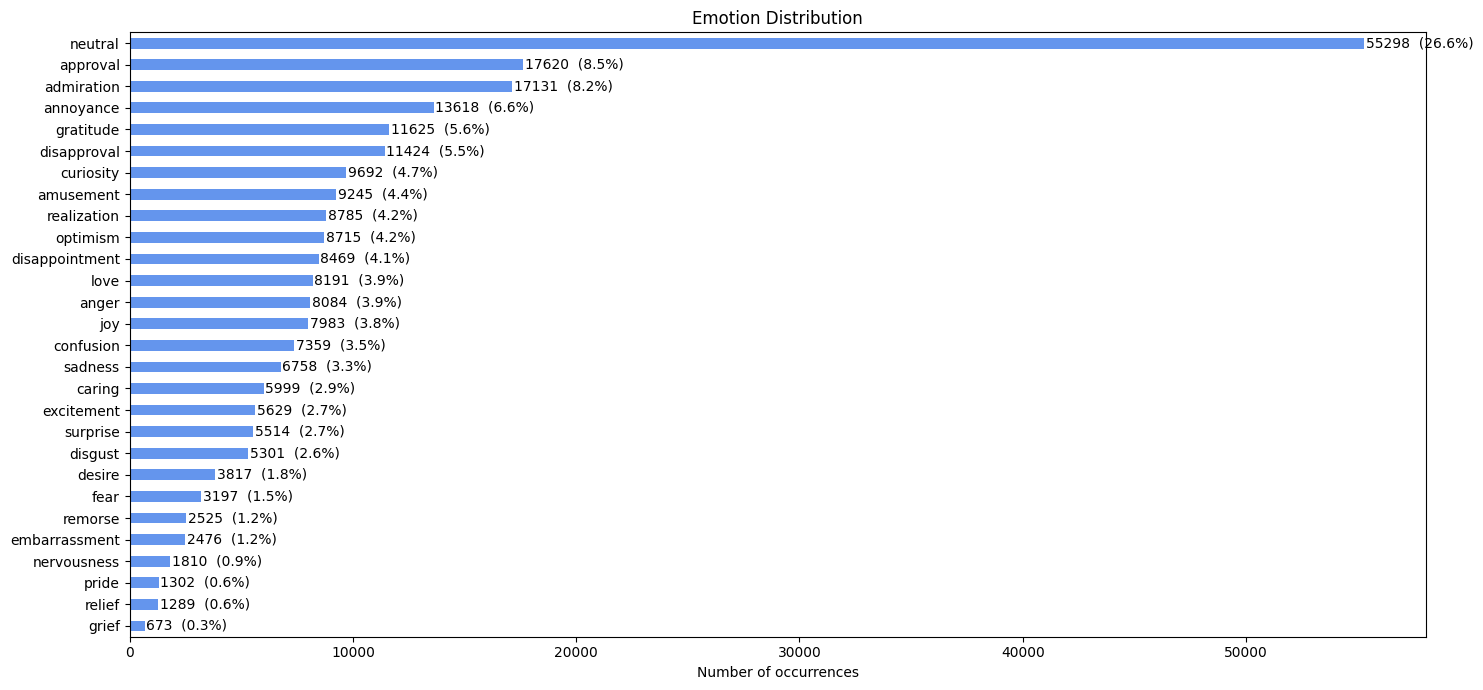

In [ ]:
import matplotlib.pyplot as plt

counts = df.iloc[:, 2:-1].sum().sort_values()

plt.figure(figsize=(15, 7))
counts.plot(kind='barh', color='cornflowerblue')
plt.title('Emotion Distribution')
plt.xlabel('Number of occurrences')
for i, v in enumerate(counts):
    plt.text(v + 80, i, f'{v}  ({v/len(df):.1%})', va='center')
plt.tight_layout()
plt.show()

### Word Cloud

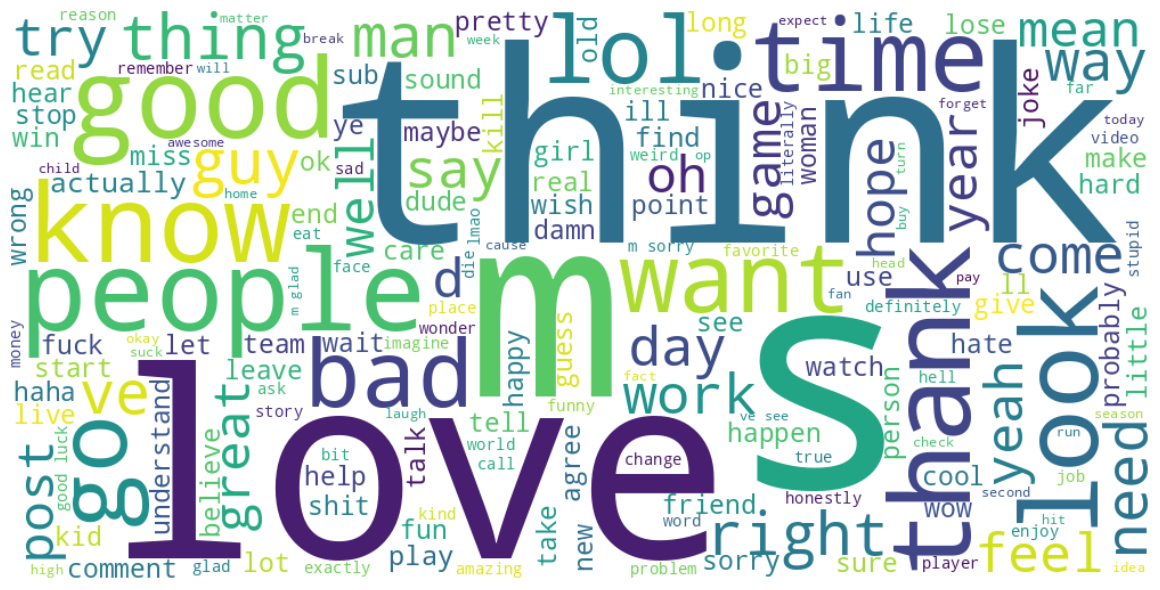

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample 20–40k rows if memory is tight
text_sample = ' '.join(df['cleaned_text'].sample(30000, random_state=42).astype(str))

wc = WordCloud(
    width=1000, height=500,
    background_color='white',
    stopwords=None,
    min_font_size=9,
    max_words=180
).generate(text_sample)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
emotion_columns = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
    'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
    'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
    'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

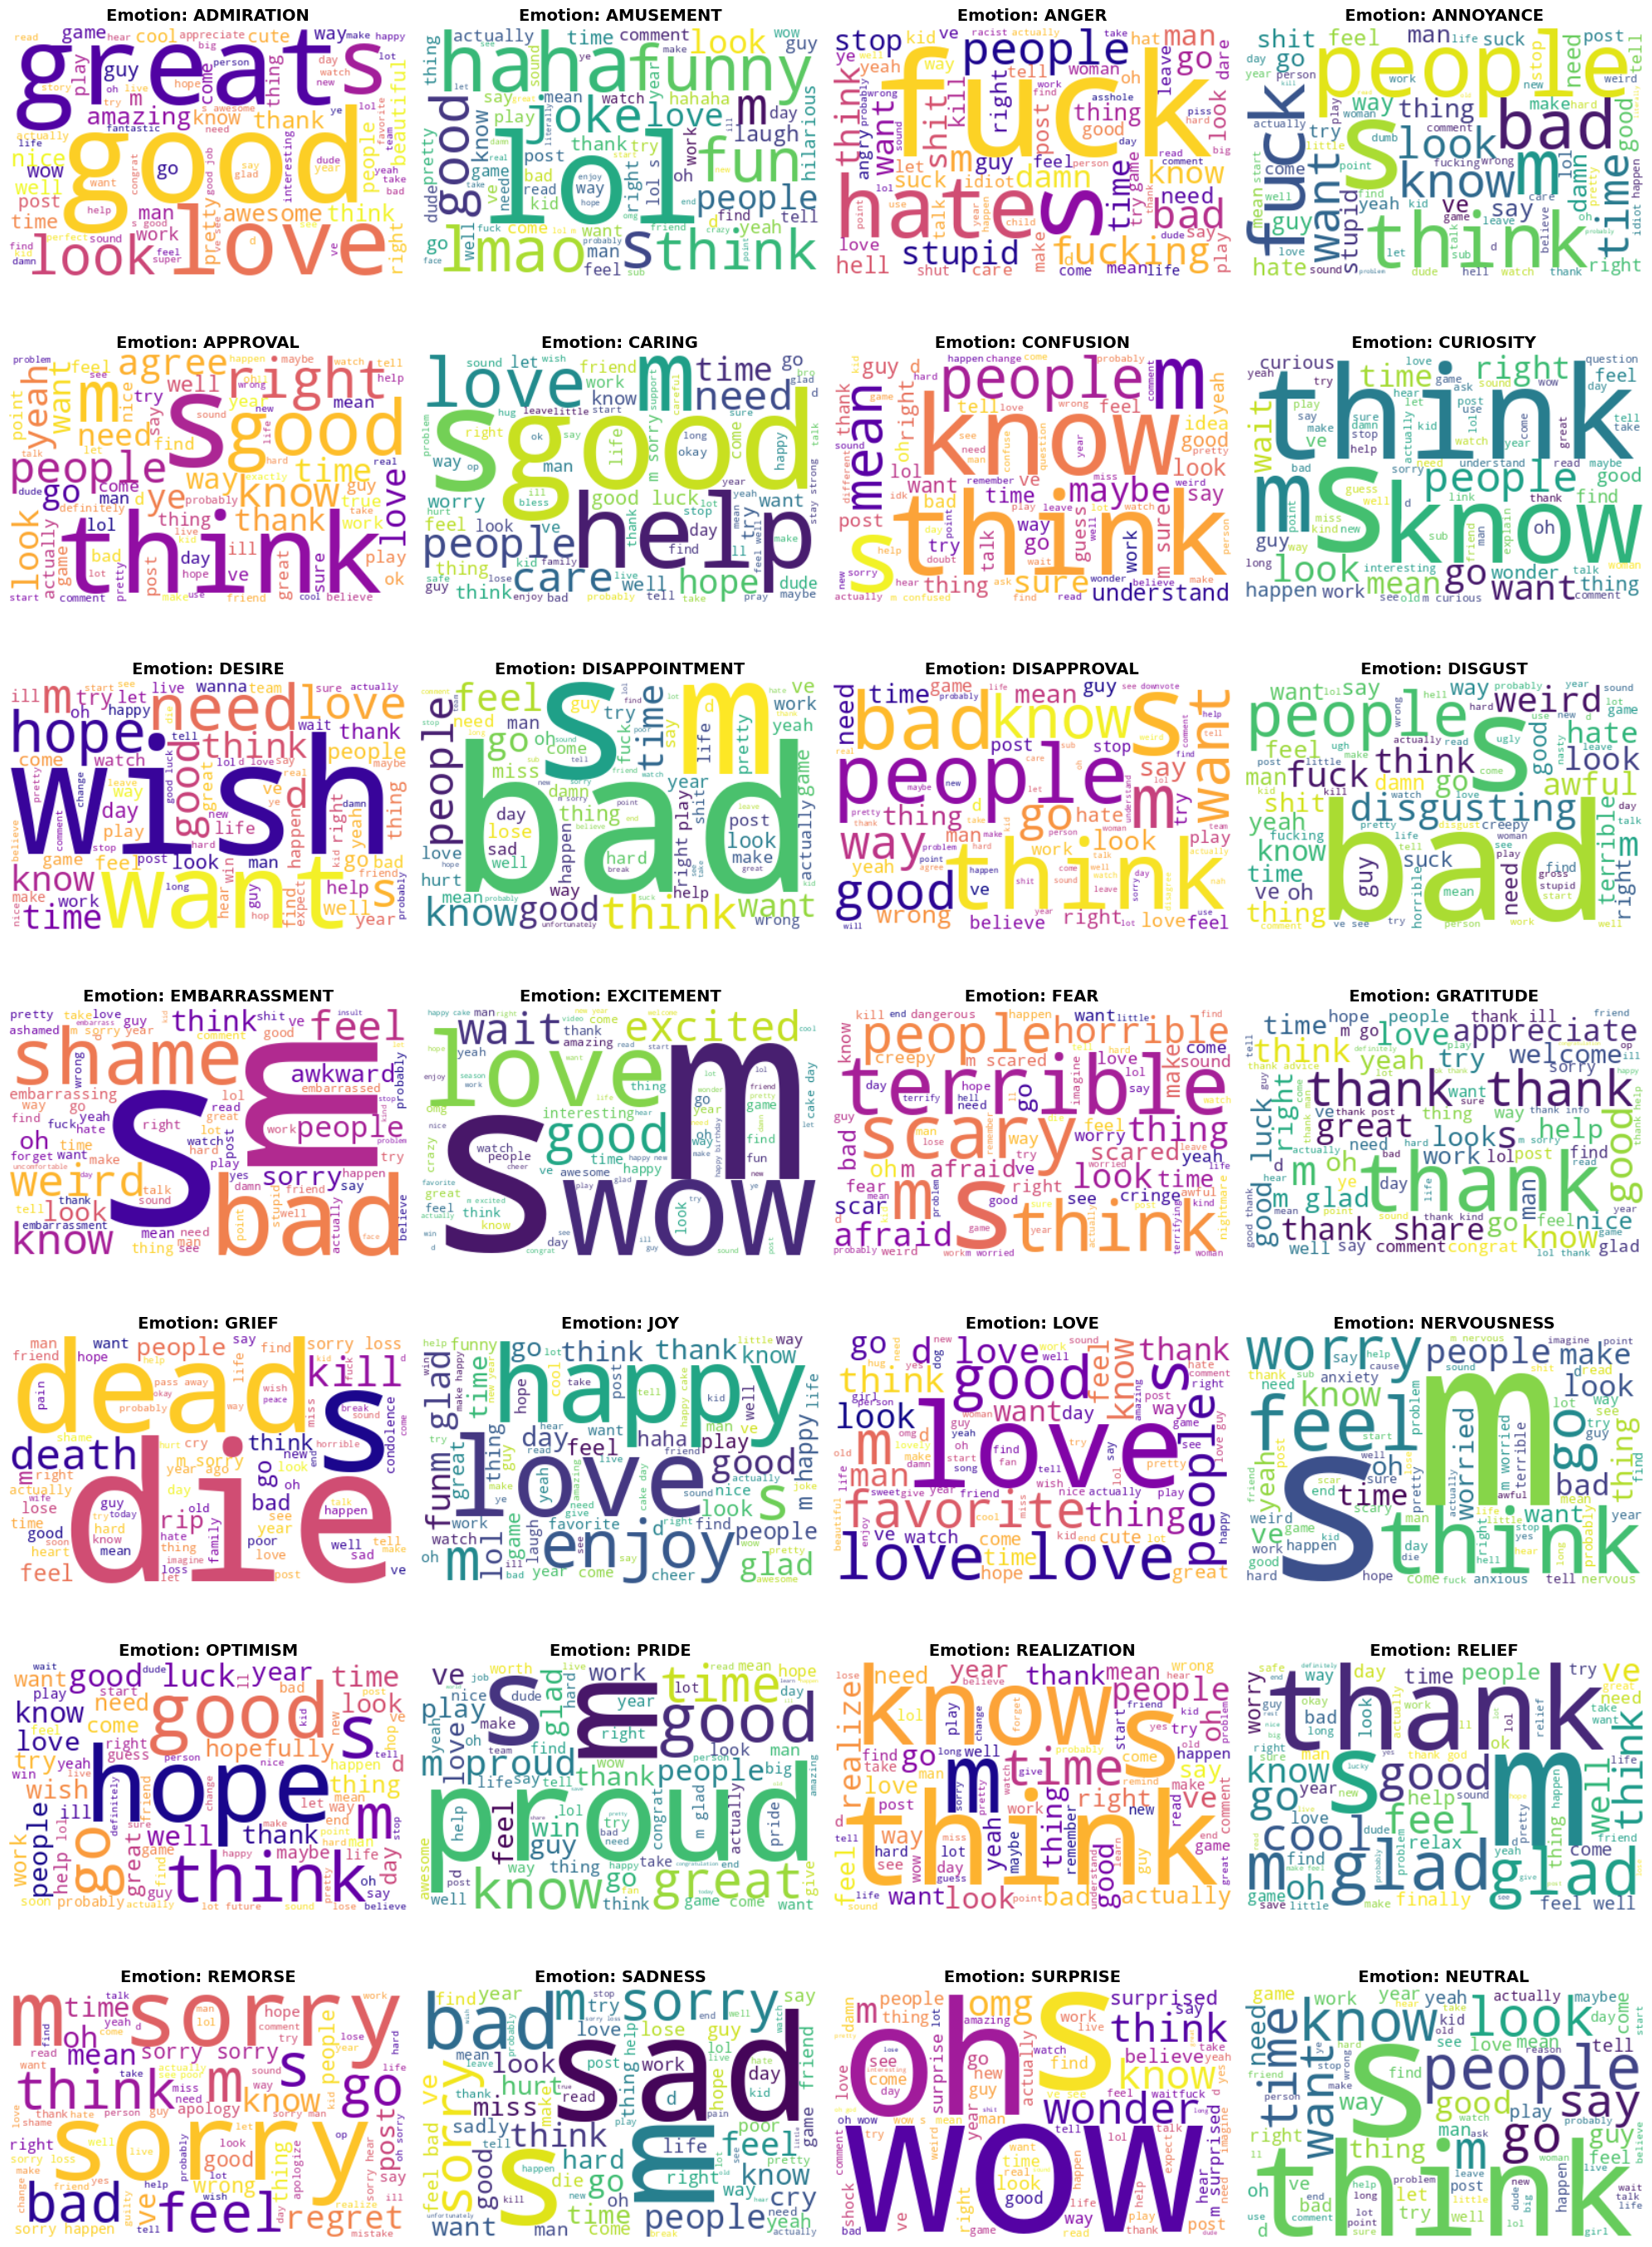

In [ ]:
from wordcloud import STOPWORDS
import math

def generate_all_emotion_wordclouds(dataframe, emotion_list):
    num_emotions = len(emotion_list)
    cols = 4
    rows = math.ceil(num_emotions / cols)

    plt.figure(figsize=(20, 4 * rows))
    stopwords = set(STOPWORDS)

    for i, emotion in enumerate(emotion_list):
        # Filter the dataframe for samples where this specific emotion is tagged
        text_subset = dataframe[dataframe[emotion] == 1]['cleaned_text'].astype(str)
        combined_text = " ".join(text_subset)

        # Ensure there is text available for this emotion
        if combined_text.strip():
            # Create the word cloud
            wc = WordCloud(
                background_color='white',
                max_words=80,
                stopwords=stopwords,
                width=400,
                height=250,
                colormap='plasma' if i % 2 == 0 else 'viridis'
            ).generate(combined_text)

            # Subplot arrangement
            plt.subplot(rows, cols, i + 1)
            plt.imshow(wc, interpolation='bilinear')
            plt.title(f'Emotion: {emotion.upper()}', fontsize=14, fontweight='bold')
            plt.axis('off')
        else:
            # Handle cases where an emotion might have no samples in the current subset
            plt.subplot(rows, cols, i + 1)
            plt.text(0.5, 0.5, 'No Data', ha='center', va='center')
            plt.title(f'Emotion: {emotion.upper()}', fontsize=14)
            plt.axis('off')

    plt.tight_layout()
    plt.show()


generate_all_emotion_wordclouds(df, emotion_columns)

In [ ]:
# Save preprocessed data
df.to_csv('preprocessed_go_emotions.csv', index=False)

print("Preprocessing completed successfully!")